<a href="https://colab.research.google.com/github/bananighosh/Fall-2023-NYU-AI/blob/main/finals/take_at_home.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## PROBLEM SET 1 - TAKE AT HOME (25 POINTS)

**You will lose all corresponding points if we can't access the implementation notebook URL or the Github URL. We will NOT message you. Do NOT invite the TAs to your Github repo (option 2 below) EARLIER than the morning of the day of the exam, since invites expire in 7 days.**

## Introduction

In the last few years, the field of generative modeling has seen a lot of progress. The techniques that have been developed in this field are very useful for other tasks such as semi-supervised learning, representation learning, and reinforcement learning. In this problem statement we attempt to prepare you to understand the basics of a technique that has been very successful in generative modeling: Variational Autoencoders (VAEs). Understanding VAEs is  the key for you to get a head start with more advanced models such as [Stable Diffusion that are all the rage these days](https://clipdrop.co/stable-diffusion-turbo).



## Task 1: Study what VAEs are and how they work (0 points)

Consult this [blog post](https://jaan.io/what-is-variational-autoencoder-vae-tutorial/) and its [2D VAE autoencoder implemenation for the MNIST dataset](https://github.com/jaanli/variational-autoencoder).

## Task 2: Replicate the VAE for the MNIST dataset (25 points)

Implement the VAE model for the MNIST dataset and train it ensuring that you plot the loss curves for the training and validation sets and perform hyperparameter optimization on the size of the latent space as well as on the optimizer parameters. To all points you need to include as comments in the code or as markdown cells what each function in the code is doing. Don't be frugal in your commentary. (15 points)

Replicate the figure showing the final latent variable space shown below. Note that you will not produce the animated figure shown below but show only the final latent space $(z_1, z_2)$. (5 points)

Show VAE generated images for all digits 0-9 after model training. (5 points)

![](latent-variables.gif)

In [31]:
import keras
from keras.datasets import mnist
from keras.layers import Input, Conv2D, Flatten, Dense, Lambda
from keras import backend as K
from keras.models import Model

import matplotlib.pyplot as plt

In [3]:
# Load the data
(X_train, y_train) ,  (X_test, y_test) = mnist.load_data()

In [6]:
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(60000, 28, 28) (60000,) (10000, 28, 28) (10000,)


In [7]:
X_train = X_train.astype('float32') / 255
X_test = X_test.astype('float32') / 255

In [12]:
img_width = X_train.shape[1]
img_height = X_train.shape[2]

# As MNIST is grey scale , sp channel is 1
num_channels = 1
X_train = X_train.reshape(X_train.shape[0], img_height, img_width, num_channels)
X_test = X_test.reshape(X_test.shape[0], img_height, img_width, num_channels)
input_shape = (img_height, img_width, num_channels)

input_shape

(28, 28, 1)

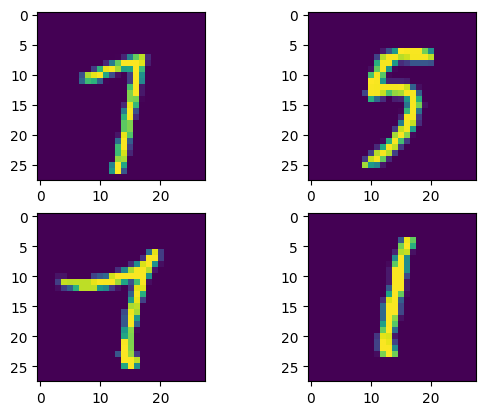

In [18]:
# View few images

plt.figure(1)
plt.subplot(221)
plt.imshow(X_train[42][:, :, 0])

plt.subplot(222)
plt.imshow(X_train[420][:, :, 0])

plt.subplot(223)
plt.imshow(X_train[4200][:, :, 0])

plt.subplot(224)
plt.imshow(X_train[42000][:, :, 0])

plt.show()

## Build the model

In [25]:
# Number of latent vector dim parameters
latent_dim = 2

input_img = Input(shape=input_shape, name = 'encoder_input')
x = Conv2D(32, 3, padding = 'same', activation='relu')(input_img)
x = Conv2D(64, 3, padding = 'same', activation='relu', strides=(2,2))(x)
x = Conv2D(64, 3, padding = 'same', activation='relu')(x)
x = Conv2D(64, 3, padding = 'same', activation='relu')(x)

conv_shape = K.int_shape(x)

# Flatten
x = Flatten()(x)
x = Dense(32, activation = 'relu')(x)

z_mu = Dense(latent_dim, name='latent_mu')(x)
z_sigma = Dense(latent_dim, name = 'latent_sigma')(x)


KerasTensor(type_spec=TensorSpec(shape=(None, 2), dtype=tf.float32, name=None), name='latent_mu/BiasAdd:0', description="created by layer 'latent_mu'")


In [26]:
print(z_mu, z_sigma)

KerasTensor(type_spec=TensorSpec(shape=(None, 2), dtype=tf.float32, name=None), name='latent_mu/BiasAdd:0', description="created by layer 'latent_mu'") KerasTensor(type_spec=TensorSpec(shape=(None, 2), dtype=tf.float32, name=None), name='latent_sigma/BiasAdd:0', description="created by layer 'latent_sigma'")


In [27]:
def sample_z(args):
  z_mu, z_sigma = args
  eps = K.random_normal(shape = (K.shape(z_mu)[0], K.int_shape(z_mu)[1]))
  return z_mu + K.exp(z_sigma / 2) * eps

In [29]:
z = Lambda(sample_z, output_shape=(latent_dim, ), name='z')([z_mu, z_sigma])
z

<KerasTensor: shape=(None, 2) dtype=float32 (created by layer 'z')>

## Encoder

In [34]:
encoder = Model(input_img, [z_mu, z_sigma, z], name = 'encoder')
print(encoder.summary())

Model: "encoder"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 encoder_input (InputLayer)  [(None, 28, 28, 1)]          0         []                            
                                                                                                  
 conv2d_13 (Conv2D)          (None, 28, 28, 32)           320       ['encoder_input[0][0]']       
                                                                                                  
 conv2d_14 (Conv2D)          (None, 14, 14, 64)           18496     ['conv2d_13[0][0]']           
                                                                                                  
 conv2d_15 (Conv2D)          (None, 14, 14, 64)           36928     ['conv2d_14[0][0]']           
                                                                                            

You have two implementation options: (1) All in one notebook (2) Github repo.

### Option 1: All in one Colab notebook

You submit a single Colab notebook URL that contains all the code and the outputs. Your notebook should be self-contained and can be launched in Google Colab using a corresponding button at the top of the notebook. See the regression notebook in the course site for an example of such button. You **need to save all outputs in the notebook** so that the TAs can check that your code is working properly.

### Option 2: Github repo

If you prefer to work without notebooks, with containers or not, you can submit the implementation python scripts and version control your code in a private Github repo. You have to submit the Github URL and clearly document the way to launch the runtime / install requirements.txt and include all required figures in the README.md file.

IMPORTANT: Ensure that the github repo remains private. If you submit a public github repo you will be held responsible for violating the honor code.